<br>
<br>

###  InstitutoTecnológico y de Estudios Superiores de Occidente ###
###  Maestría Ciencia de Datos  ###
###  Investigación, Desarrollo e Innovación II  ###
###  Tarea 2: Gradiente descendente  ###
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Fernando Becerra <br>
25 Septiembre 2021 <br>

<div style="page-break-after: always;"></div>
<br>
<br>

Realice código en Python que, recibiendo un sistema de n  ecuaciones no lineales $ fi(x1,...,xn)=0 $, un valor inicial $ X0 $  y una exactitud (error) dado $ E $ , encuentre (si existe) mediante el método de Newton-Raphson una aproximación de exactitud menor a $ E $

  para una solución del sistema. Asegúrese que cuenta el número de iteraciones realizadas.

Use su código para resolver los siguientes ejercicios (en todos los casos indique el(los) valor(es) inicial(es) que utilizó y el número de iteraciones que fueron necesarias para alcanzar la respuesta).

Escriba sus respuestas con 5 cifras significativas.

Encuentre todas las soluciones exactas dentro de $ 10e−4 $:

### Par de funciones 1:
$$ f(x , y) = x^2 + y - 1 $$
$$ g(x , y) = x - 2y^2 $$

In [1]:
import sympy as sp #start sympy
sp.init_printing()

x, y = sp.symbols('x y')

f = x**2 + y - 1
df_dx = f.diff(x,1)
df_dy = f.diff(y,1)
f

C:\Users\nuno\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\nuno\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\nuno\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\nuno\AppData\Local\Continuum\anaconda3\li

In [2]:
g = x - 2*y**2
dg_dx = g.diff(x,1)
dg_dy = g.diff(y,1)
g

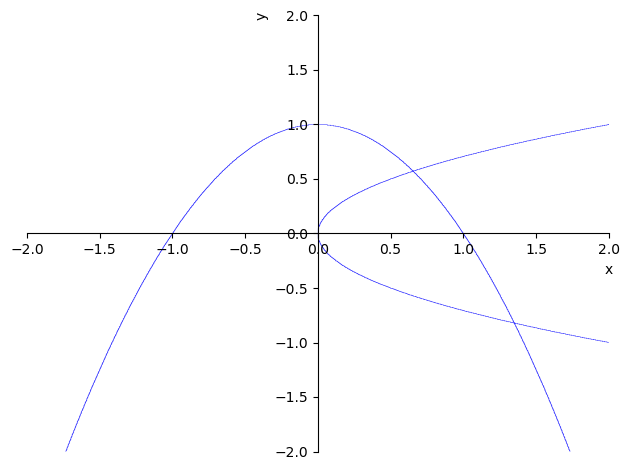

In [3]:
plot_f = sp.plot_implicit(sp.Eq(f,0), x_var=(x, -2, 2), y_var=(y, -2,2), show=False)
plot_g = sp.plot_implicit(sp.Eq(g,0), x_var=(x, -2, 2), y_var=(y, -2,2), show=False)
plot_f.append(plot_g[0])
plot_f.show()

Vemos que la primera intersección esta cerca de x = 0.7 y y = 0.5.

In [4]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = 1 #x inicial
y0 = 1 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 3
Usando x inicial: 1.0000
Usando y inicial: 1.0000
x final es: 0.65425
y final es: 0.57197


Vemos que la primera intersección esta cerca de x = 1.5 e y = -1.

In [5]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = 1.5 #x inicial
y0 = -1 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 2
Usando x inicial: 1.5000
Usando y inicial: -1.0000
x final es: 1.3498
y final es: -0.82174


### Par de funciones 2:
$$ f(x , y) = x^2 -10x + y^2 +5 $$
$$ g(x , y) = xy^2 + x - 10y + 8 $$

In [6]:
#asignar funcion f(x,y) y asegurar que esta correcta
f = x**2 +10*x + y**2 + 5
f

C:\Users\nuno\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\nuno\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\nuno\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\nuno\AppData\Local\Continuum\anaconda3\li

In [7]:
#asignar funcion g(x,y) y asegurar que esta correcta
g = x*y**2 + x - 10*y + 8
g

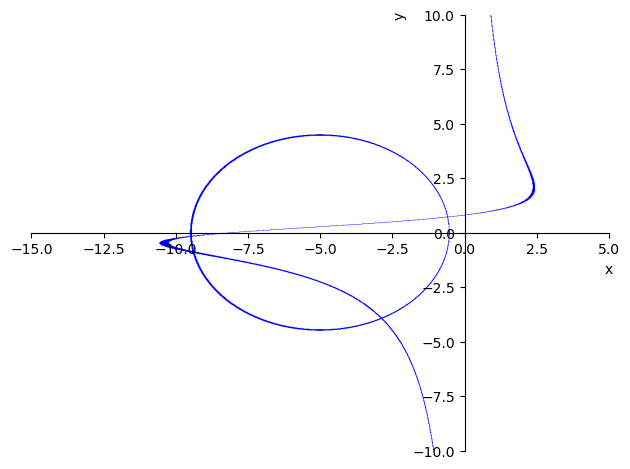

In [8]:
# grafica de f y g
plot_f = sp.plot_implicit(sp.Eq(f,0), x_var=(x, -15, 5), y_var=(y, -10,10), show=False)
plot_g = sp.plot_implicit(sp.Eq(g,0), x_var=(x, -15, 5), y_var=(y, -10,10), show=False)
plot_f.append(plot_g[0])
plot_f.show()

Vemos que la primera intersección esta cerca de x = .5 y y = .5.

In [9]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = 0.5 #x inicial
y0 = 0.5 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 3
Usando x inicial: 0.50000
Usando y inicial: 0.50000
x final es: -0.58489
y final es: 0.71187


Vemos que la segunda intersección esta cerca de x = -3 . y y = 33.

In [10]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = -3 #x inicial
y0 = -3 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 3
Usando x inicial: -3.0000
Usando y inicial: -3.0000
x final es: -2.8732
y final es: -3.9340


Vemos que la tercera intersección esta cerca de x = -9 . y y = 0.

In [11]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = -9 #x inicial
y0 = 0 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 3
Usando x inicial: -9.0000
Usando y inicial: 0
x final es: -9.4687
y final es: -0.17629


Vemos que la cuarta intersección esta cerca de x = -9 . y y = -2.

In [12]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = -9 #x inicial
y0 = -2 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 4
Usando x inicial: -9.0000
Usando y inicial: -2.0000
x final es: -9.3800
y final es: -0.90334


### Par de funciones 3:
$$ f(x , y) = x sin(y) - 1 $$
$$ g(x , y) = x^2 + y^2 - 4 $$

In [13]:
#asignar funcion f(x,y) y asegurar que esta correcta
f =x*sp.sin(y) -1
f

In [14]:
#asignar funcion g(x,y) y asegurar que esta correcta
g = x**2 + y**2 -4
g

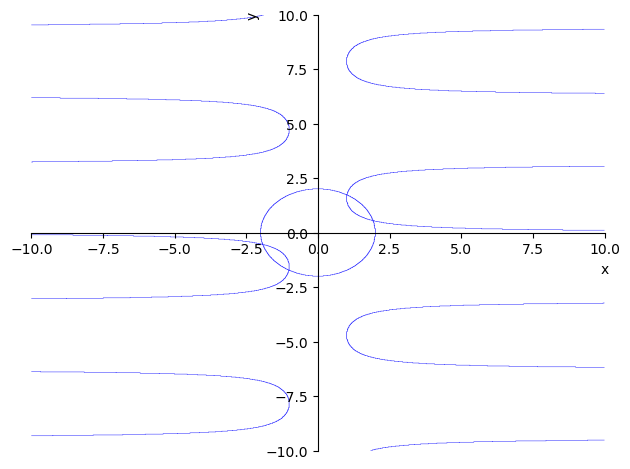

In [15]:
# grafica de f y g
plot_f = sp.plot_implicit(sp.Eq(f,0), x_var=(x, -10, 10), y_var=(y, -10,10), show=False)
plot_g = sp.plot_implicit(sp.Eq(g,0), x_var=(x, -10, 10), y_var=(y, -10,10), show=False)
plot_f.append(plot_g[0])
plot_f.show()

Vemos que la primera intersección esta cerca de x = 2 . y y = 0.

In [16]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = 2 #x inicial
y0 = 0 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 3
Usando x inicial: 2.0000
Usando y inicial: 0
x final es: 1.9239
y final es: 0.54659


Vemos que la segunda intersección esta cerca de x = 1 . y y = 2.

In [17]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = 1 #x inicial
y0 = 2 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 3
Usando x inicial: 1.0000
Usando y inicial: 2.0000
x final es: 1.0120
y final es: 1.7251


Vemos que la tercera intersección esta cerca de x = -2 . y y = -1.

In [18]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = -2 #x inicial
y0 = -1 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 4
Usando x inicial: -2.0000
Usando y inicial: -1.0000
x final es: -1.9239
y final es: -0.54660


Vemos que la cuarta intersección esta cerca de x = -1 . y y = -2.5.

In [19]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = -1 #x inicial
y0 = -2.5 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 3
Usando x inicial: -1.0000
Usando y inicial: -2.5000
x final es: -1.0119
y final es: -1.7252


### Par de funciones 4:
$$ f(x , y) = y^2ln(x) - 3 $$
$$ g(x , y) = y - x^2 $$

In [20]:
#asignar funcion f(x,y) y asegurar que esta correcta
f =y**2*sp.log(x) - 3
f

In [21]:
#asignar funcion g(x,y) y asegurar que esta correcta
g = y-x**2
g

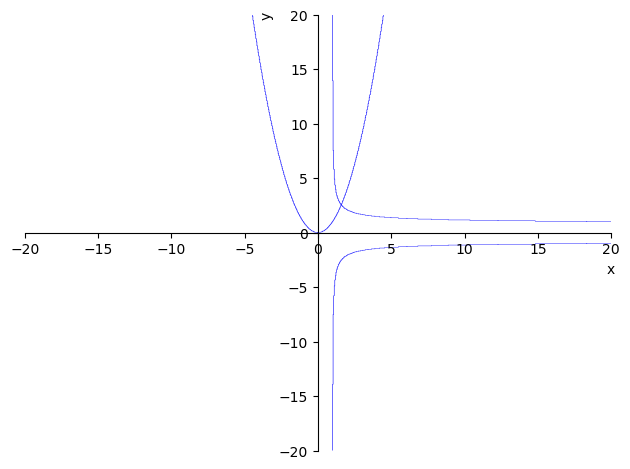

In [22]:
# grafica de f y g
plot_f = sp.plot_implicit(sp.Eq(f,0), x_var=(x, -20, 20), y_var=(y, -20,20), show=False)
plot_g = sp.plot_implicit(sp.Eq(g,0), x_var=(x, -20, 20), y_var=(y, -20,20), show=False)
plot_f.append(plot_g[0])
plot_f.show()

Vemos que la cuarta intersección esta cerca de x = 1 . y y = 2.5.

In [23]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = 1 #x inicial
y0 = 2.5 #y inicial
X0 = sp.Matrix([x0, y0]) #x e y
F = sp.Matrix([f,g]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0}),
                g.evalf(subs={x: x0, y: y0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    F_xy_1 = F.evalf(subs={x: x1, y: y1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))

El número de iteraciones fue: 4
Usando x inicial: 1.0000
Usando y inicial: 2.5000
x final es: 1.5931
y final es: 2.5381


### Trío de funciones 4:
$$ f(x , y, z) = x+y-z+2 $$
$$ g(x , y, z) = x^2+y $$
$$ h(x , y, z) = z-y^2-1 $$

In [24]:
x, y, z = sp.symbols('x y z')
#asignar funcion f(x,y) y asegurar que esta correcta
f =x+y+2-z
f

In [25]:
#asignar funcion f(x,y) y asegurar que esta correcta
g = x**2+y
g

In [26]:
#asignar funcion f(x,y) y asegurar que esta correcta
h = -y**2-1 +z
h

Porque son tres variables independientes no es posible graficar. Buscaremos por 6 combinaciones de valores iniciales.

In [27]:
exactitud = 10e-4
iteraciones = 0
norma_dos = 1
x0 = 1 #x inicial
y0 = 1 #y inicial
z0 = 1 #z inicial
X0 = sp.Matrix([x0, y0, z0]) #x e y
F = sp.Matrix([f,g,h]) #matrix F(x,y) no evaluada
J_inverse = F.jacobian([x,y,z]).inv() #matrix jacobiana inversa no evaluada
F_xy_0 = sp.Matrix([f.evalf(subs={x: x0, y: y0, z: z0}),
                    g.evalf(subs={x: x0, y: y0, z: z0}),
                   h.evalf(subs={x: x0, y: y0, z: z0})]) #matrix F(x,y) evaluada en X0]
list_X = [sp.N(X0, 5)]
list_F = [sp.N(F_xy_0, 5)]

while norma_dos >= exactitud:
    iteraciones += 1
    J_inverse_xy_0 = J_inverse.evalf(subs={x: x0, y: y0, z: z0}) #matrix jacobiana inversa evaluada en X0

    X1 = list_X[-1] - J_inverse_xy_0*list_F[-1]
    x1 = X1[0]
    y1 = X1[1]
    z1 = X1[2]
    F_xy_1 = F.evalf(subs={x: x1, y: y1, z: z1}) #matrix F(x,y) evaluada en X1
    
    norma_dos = sp.N(( F_xy_1[0]**2 + F_xy_1[1]**2 + F_xy_1[2]**2 )**(1/2), 5)
    list_X.append(sp.N(X1,5))
    list_F.append(sp.N(F_xy_1, 5))
    x0 = x1 #new x
    y0 = y1 #new y
    z0 = z1 #new x

print('El número de iteraciones fue: ' + str(iteraciones))
print('Usando x inicial: ' + str(list_X[0][0]))
print('Usando y inicial: ' + str(list_X[0][1]))
print('Usando z inicial: ' + str(list_X[0][2]))
print('x final es: ' + str(list_X[-1][0]))
print('y final es: ' + str(list_X[-1][1]))
print('z final es: ' + str(list_X[-1][2]))

El número de iteraciones fue: 44
Usando x inicial: 1.0000
Usando y inicial: 1.0000
Usando z inicial: 1.0000
x final es: -0.57013
y final es: -0.32455
z final es: 1.1053


Después de buscar con varias combinaciones de valores todos parecen retornar el mismo resultado. Concluimos que la única solución es la mostrada arriba.